In [63]:
import pandas as pd
df = pd.read_csv("D:\mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [64]:
df.shape

(8124, 23)

In [65]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [66]:
#Print Summary

print('shape---------->', df.shape)
print('Each column and data type and its count', '\n')
print(df.info())

shape----------> (8124, 23)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-su

We see the dtype for all the 23 columns is object, which needs to be changed , our ML models will never understand object Dtype.
And we have identified our label here in dataset is 'class'.

In [67]:
#Now lets check whether its a binary classification or 3 types or 4 types, basically the classification of label.
#we will check the unique data of label.

df['class'].unique()

array(['p', 'e'], dtype=object)

In [68]:
#Now lets check balance nature for classification problem.
#Whether the dataset is balanced or not.

df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

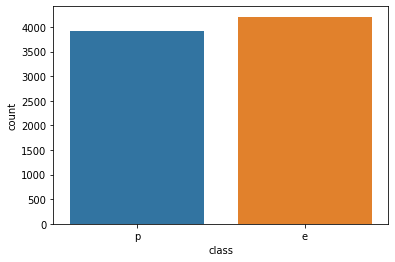

Edible(e) =>  4208
Poisonous(p) =>  3916


In [69]:
#Seems the dataset is not imbalanced.We are good to proceed.
#Lets plot each class frequency.

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'class', data = df)
plt.show()

print('Edible(e) => ' , df['class'].value_counts()[0] )
print('Poisonous(p) => ' , df['class'].value_counts()[1] )          

# Lets encode our dataset with LabelEncoder()

In [70]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
for column in df.columns:
    df[column] = lab_enc.fit_transform(df[column])
    
df    

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [71]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


We have successfully encoded our dataset

In [11]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Seems no columns have nulls. Good to proceed.

In [12]:
#Correlation
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [13]:
#the column veil-type has NaN's in correlation , so we drop it.

df['veil-type']



0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [73]:
df = df.drop(['veil-type'], axis=1)
df.shape

(8124, 22)

23 columns has changed to 22 columns , veil-type column eliminated

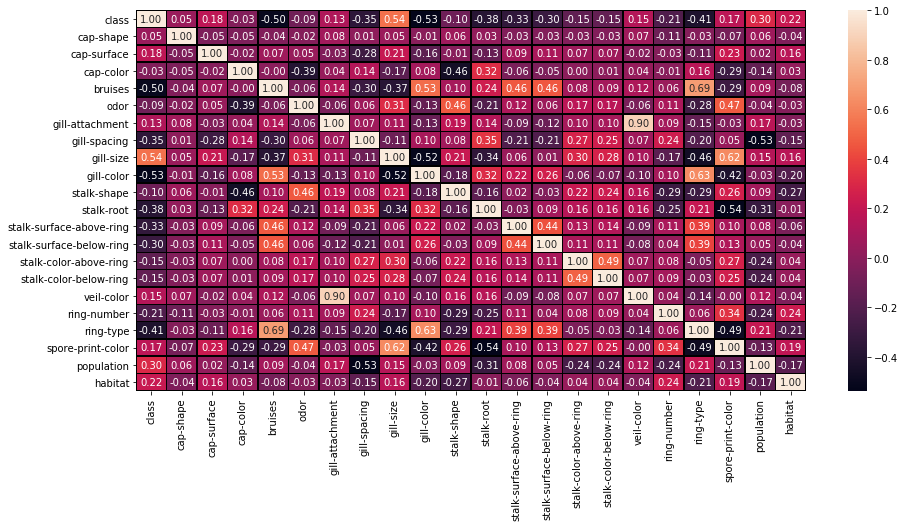

In [15]:
#Correlation using Heatmap

import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(),annot = True, linewidths = 0.5, linecolor ="black", fmt = '.2f')

#Outcome of correlation:
    
    cap-shape, cap-surface, gill-attachment, gill-size, stalk-root, veil-color, spore-print-color, population, habitat 
    positively correlated. While cap-color, bruises, odor, gill-spacing, gill-color, stalk-shape, stalk-root,  
    stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, ring-number,
    ring-type are negatively correlated. Cap-color has 3% correlation with the class which can be considered as a weak         bond.
    Cap-shape has 5% correlation with the class which can be considered as a weak bond. Odor has 9% correlation with the 
    class which can be considered as a weak bond. Stalk-shape has 10% correlation with the class which can be considered
    as a good bond. Gill-attachment has 13% correlation with the class which can be considered as a good bond. Veil-color
    has 15% correlation with the class which can be considered as a good bond. Stock-color-below-ring has 15% correlation       with the class which can be considered as a good bond.  Stock-color-above-ring has 15% correlation with the class which     can be considered as a good bond.  Spore-print-color has 17% correlation with the class which can be considered as a       good bond. Cap-surface has 18% correlation with the class which can be considered as a good bond. Ring-number has 21%       correlation with the class which can be considered as a good bond.  Habitat has 22% correlation with the class which       can be considered as a good bond.  Population has 30% correlation with the class which can be considered as a good         bond. Stalk-surface-below-ring has 30% correlation with the class which can be considered as a good bond.  Stalk-           surface-above-ring has 33% correlation with the class which can be considered as a good bond.  Gill-spacing has 35%         correlation with the class which can be considered as a good bond.  Stalk-root has 38% correlation with the class which     can be considered as a good bond.  Ring-type has 41% correlation with the class which can be considered as a strong         bond.  Bruises has 50% correlation with the class which can be considered as a strong bond. Gill-color has 53%             correlation with the class which can be considered as a strong bond.  Gill-size has 54% correlation with the class         which can be considered as a strong bond. 
    

# Describing Dataset

In [74]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


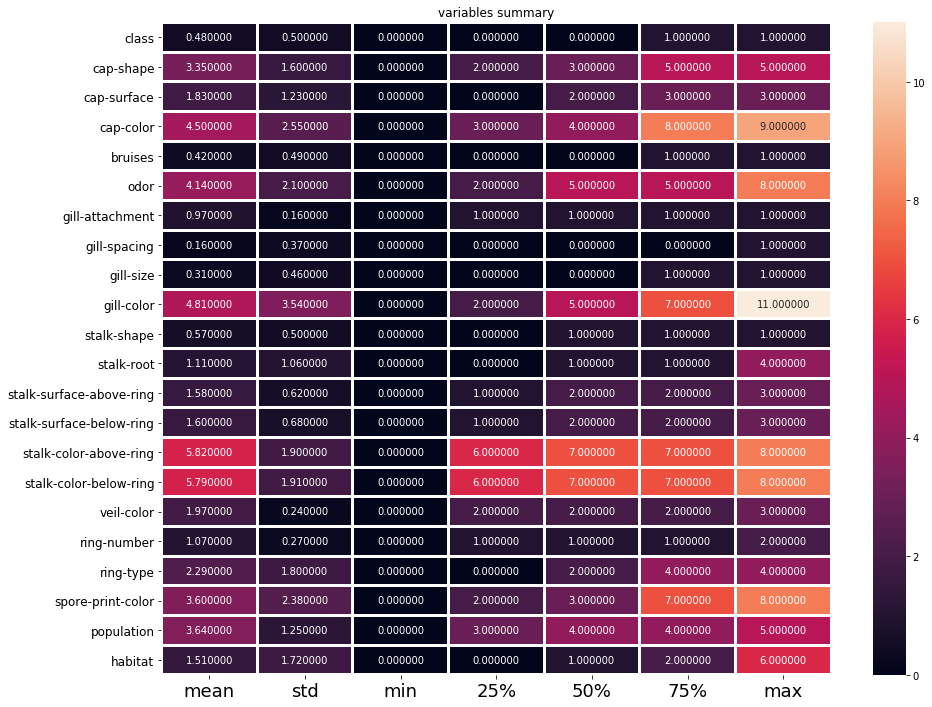

In [17]:
#Describe using Heatmap:

plt.figure(figsize = (15,12))
sns.heatmap(round(df.describe()[1:].transpose(), 2), linewidth = 2, annot = True, fmt = 'f')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 12)
plt.title("variables summary")
plt.show()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

# Outliers checking:

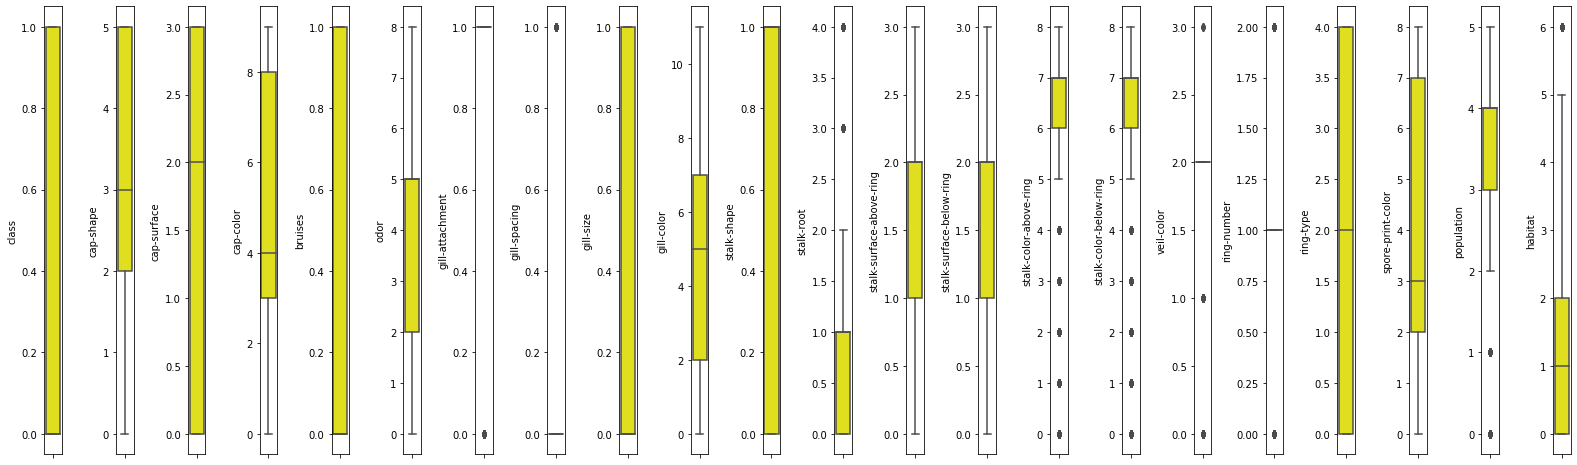

In [19]:
#With boxplot we check the min value, max value & the outliers.

collist = df.columns.values
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]], color ='yellow' , orient = 'v')
    plt.tight_layout()

From the above boxplots we can see that columns["cap-space","cap-surface","cap-color","bruises","odor","gill-size",
                                                "gill-color","stalk-shape","stalk-surface-above-ring",
                                                "stalk-suurface-below-ring","ring-type","space-print-color"] have no outliers,
and columns["gill-attachment","gill-spacing","stalk-root","stalk-color-above-ring","stalk-color-below-ring","veil-color",
            "ring-number" , "population","habitat"] has outliers.                                   ]


# Skewness:

In [20]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

#Outcome of skewness: Skewness threshold is taken as +/-0.5
columns which are having skewness are:
    cap-surface
    cap-color
    gill-attachment
    gill-spacing
    gill-size
    stalk-root
    stalk-surface-above-ring
    stalk-surface-below-ring
    stalk-color-above-ring
    stalk-color-below-ring
    veil-color
    ring-number
    spore-print-color
    population
    habitat

# Normal Distribution Curve:

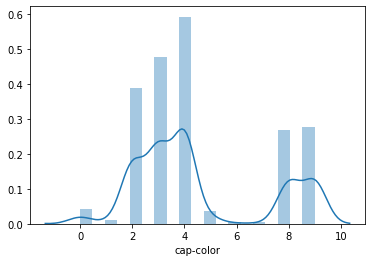

In [21]:
#Distplot represents uni-variant(single-column) distribution of data, 
#shows the data distribution of variable against density distribution.

sns.distplot(df["cap-color"])

The data is not normalized. The building blocks are out of the normalized data.

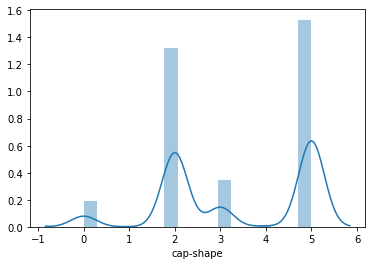

In [22]:
sns.distplot(df["cap-shape"])

The data is not normalized. The building blocks are out of the normalized data.

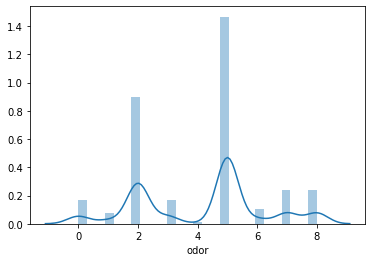

In [23]:
sns.distplot(df["odor"])

The data is not normalized. The building blocks are out of the normalized data.

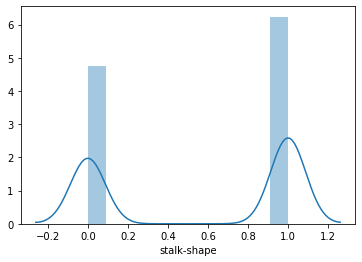

In [24]:
sns.distplot(df["stalk-shape"])

The data is not normalized. The building blocks are out of the normalized data.

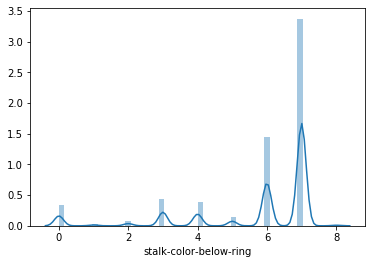

In [25]:
sns.distplot(df["stalk-color-below-ring"])

The data is not normalized. The building blocks are out of the normalized data.

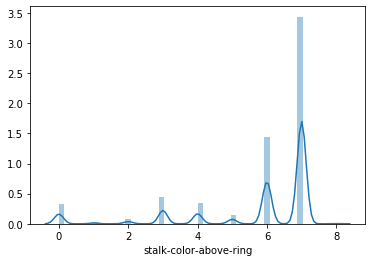

In [26]:
sns.distplot(df["stalk-color-above-ring"])

The data is not normalized. The building blocks are out of the normalized data.

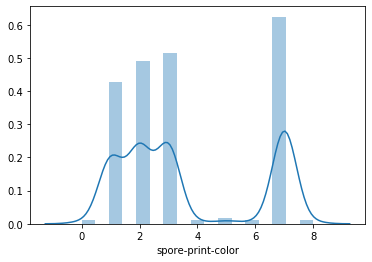

In [27]:
sns.distplot(df["spore-print-color"])

The data is not normalized. The building blocks are out of the normalized data.

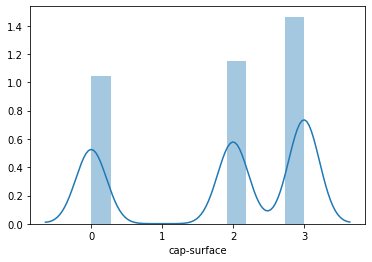

In [28]:
sns.distplot(df["cap-surface"])

The data is not normalized. The building blocks are out of the normalized data.

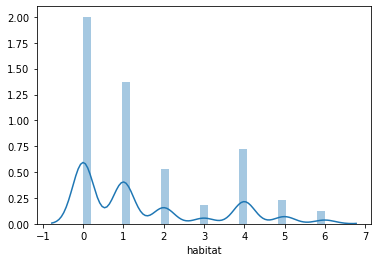

In [29]:
sns.distplot(df["habitat"])

The data is not normalized. The building blocks are out of the normalized data.

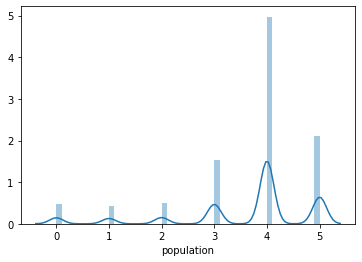

In [30]:
sns.distplot(df["population"])

The data is not normalized. The building blocks are out of the normalized data.

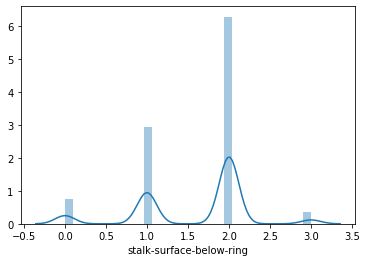

In [31]:
sns.distplot(df["stalk-surface-below-ring"])

The data is not normalized. The building blocks are out of the normalized data.

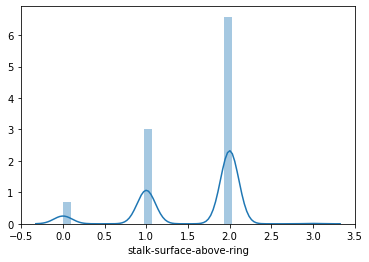

In [32]:
sns.distplot(df["stalk-surface-above-ring"])

The data is not normalized. The building blocks are out of the normalized data.

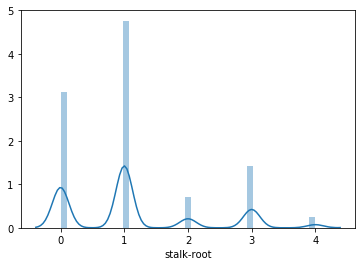

In [33]:
sns.distplot(df["stalk-root"])

The data is not normalized. The building blocks are out of the normalized data.

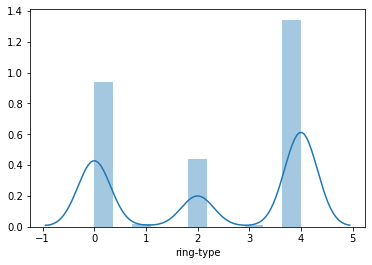

In [34]:
sns.distplot(df["ring-type"])

The data is not normalized. The building blocks are out of the normalized data.

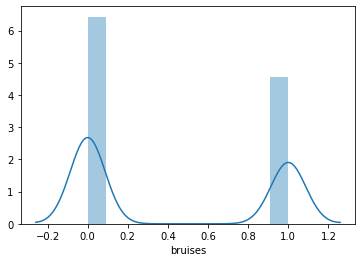

In [35]:
sns.distplot(df["bruises"])

The data is not normalized. The building blocks are out of the normalized data.

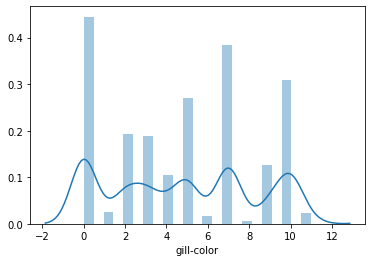

In [36]:
sns.distplot(df["gill-color"])

The data is not normalized. The building blocks are out of the normalized data.

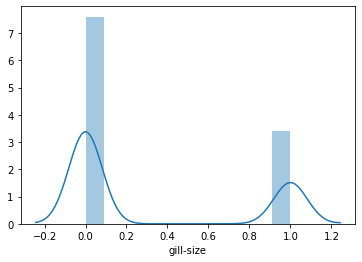

In [37]:
sns.distplot(df["gill-size"])

The data is not normalized. The building blocks are out of the normalized data.

The normal distribution curve of the class is irrelevant.

The normal distribution shows that the data is skewed.

# Data Cleaning:

In [75]:
delete = pd.DataFrame([["-0.03","cap-color","no","no"] , ["0.05","cap-shape","no","no"] , ["-0.09","odor","no","no"] ,
                       ["-0.1","stalk-shape","no","no"]] , 
                     columns=["Correlation with Target","Column Name","Normalized","Outliers"])
delete

,Correlation with Target,Column Name,Normalized,Outliers
0,-0.03,cap-color,no,no
1,0.05,cap-shape,no,no
2,-0.09,odor,no,no
3,-0.1,stalk-shape,no,no


Here we are setting threshold of correlation as +/-0.1.It is not standard.The dataset demands.

In [76]:
df = df.drop(["cap-color","cap-shape","odor", "stalk-shape"], axis = 1)
df

,class,cap-surface,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,1,1,0,1,4,3,2,2,7,7,2,1,4,2,3,5
1,0,2,1,1,0,0,4,2,2,2,7,7,2,1,4,3,2,1
2,0,2,1,1,0,0,5,2,2,2,7,7,2,1,4,3,2,3
3,1,3,1,1,0,1,5,3,2,2,7,7,2,1,4,2,3,5
4,0,2,0,1,1,0,4,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,0,0,0,0,11,0,2,2,5,5,1,1,4,0,1,2
8120,0,2,0,0,0,0,11,0,2,2,5,5,0,1,4,0,4,2
8121,0,2,0,0,0,0,5,0,2,2,5,5,1,1,4,0,1,2
8122,1,3,0,1,0,1,0,0,2,1,7,7,2,1,0,7,4,2


19 columns => 3 more columns deleted from the remaining dataset , previously veil-type column is deleted
              that means total 4 columns are eliminated from the given dataset.


# Removing Outliers:

Z-Score Technique: Z score allows us to calc. the probability of a score occuring within our normal distribution.
                   Z score means, how many standard deviations a given data point lies above or below mean.
                   
                   

In [77]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
z.shape

(8124, 18)

In [78]:
threshold = 3.1
print(np.where(z>3.1))


#In a normal distribution curve that we already checked skewness, for a normal distribution it is an estimation that most of the times 60% of data points lies between range =/-1 of standard deviation, 95% of data points lies between range =/-2 of standard deviation, 99.7% of data points lies between range =/-3 of standard deviation. Thats why we give threshold value 3.
#If any points lie beyond +/-3 that will be considered an outlier.

(array([3984, 4106, 4283, ..., 8121, 8123, 8123], dtype=int64), array([13, 13, 13, ..., 12,  3, 12], dtype=int64))


In [79]:
#storing the data that is present inn +/-3 in anew variable. storing the data point that exist in S.D of +/-3.

df_new = df[(z<3.1).all(axis = 1)]
print(df.shape)
print(df_new.shape)


(8124, 18)
(7288, 18)


In [80]:
#Percentage Dataloss:
loss_percent= (8124-7288)/8124*100
print(loss_percent)

10.290497291974397


In [81]:
#Dividing data in features and class:

x = df.drop('class',axis=1)
y = df['class']

In [82]:
#Transforming data to remove skewness:

from sklearn.preprocessing import power_transform
x = power_transform(x, method = 'yeo-johnson')
x

array([[ 0.05017017,  1.18591657,  0.16289645, ..., -0.53714841,
        -0.80052972,  1.51548871],
       [ 0.05017017,  1.18591657,  0.16289645, ...,  0.01906382,
        -1.47485647,  0.11634762],
       [ 0.05017017,  1.18591657,  0.16289645, ...,  0.01906382,
        -1.47485647,  1.06633941],
       ...,
       [ 0.05017017, -0.84322964, -6.13886914, ..., -2.80619461,
        -1.89857525,  0.70247929],
       [ 0.99864626, -0.84322964,  0.16289645, ...,  1.29862534,
         0.15412432,  0.70247929],
       [ 0.05017017, -0.84322964, -6.13886914, ...,  0.4401869 ,
        -1.89857525,  0.70247929]])

# Scaling:

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.05017017,  1.18591657,  0.16289645, ..., -0.53714841,
        -0.80052972,  1.51548871],
       [ 0.05017017,  1.18591657,  0.16289645, ...,  0.01906382,
        -1.47485647,  0.11634762],
       [ 0.05017017,  1.18591657,  0.16289645, ...,  0.01906382,
        -1.47485647,  1.06633941],
       ...,
       [ 0.05017017, -0.84322964, -6.13886914, ..., -2.80619461,
        -1.89857525,  0.70247929],
       [ 0.99864626, -0.84322964,  0.16289645, ...,  1.29862534,
         0.15412432,  0.70247929],
       [ 0.05017017, -0.84322964, -6.13886914, ...,  0.4401869 ,
        -1.89857525,  0.70247929]])

In [93]:
#Now since the class has only 2 variable, we will use binary classification model.
#importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score

In [94]:
# Splitting the DataFrame 

for i in range (0,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i, test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,3) == round(accuracy_score(y_test,pred_test)*100,3):
        print("At random_state", i , "the model performs very well")
        print("Random_state: ", i)
        print("Training accuracy is: ", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy is: ",accuracy_score(y_test,pred_test)*100 )
    

At random_state 210 the model performs very well
Random_state:  210
Training accuracy is:  95.6916448684413
Testing accuracy is:  95.6923076923077
At random_state 360 the model performs very well
Random_state:  360
Training accuracy is:  95.13771349438375
Testing accuracy is:  95.13846153846154
At random_state 418 the model performs very well
Random_state:  418
Training accuracy is:  95.13771349438375
Testing accuracy is:  95.13846153846154


In [86]:
#We take the random state where we have maximum accuracy

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size= .20, random_state = 210)

# Classification Report: 

In [95]:
accuracy = accuracy_score(y_test,pred_test)
accuracy

0.9452307692307692

In [96]:
#In classification report, we check the unseen data , i.e., the test data.

from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       850
           1       0.96      0.93      0.94       775

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625



Our classification report gives 95% accuracy at random_state 210.

# Cross Validation score for Logistic Regression:

In [97]:
#to check if our model is overfitting

pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At CV:", j)
    print("Cross Validation score is:" , lsc*100)
    print("accuracy_score is", lss*100)
    print("\n")


At CV: 2
Cross Validation score is: 76.57557853274248
accuracy_score is 94.52307692307691


At CV: 3
Cross Validation score is: 78.81585425898572
accuracy_score is 94.52307692307691


At CV: 4
Cross Validation score is: 82.5947808961103
accuracy_score is 94.52307692307691


At CV: 5
Cross Validation score is: 83.61240621447517
accuracy_score is 94.52307692307691


At CV: 6
Cross Validation score is: 87.81388478581981
accuracy_score is 94.52307692307691


At CV: 7
Cross Validation score is: 88.09518505789556
accuracy_score is 94.52307692307691


At CV: 8
Cross Validation score is: 86.60488828982584
accuracy_score is 94.52307692307691


At CV: 9
Cross Validation score is: 89.41185072778946
accuracy_score is 94.52307692307691




We will select the CV , where the CV score and the accuracy_score are very close, i.e., with least CV score-accuracy_score
difference.Here at CV:9 , the CV score and the accuracy_score are very close. So we pick CV = 9.

In [98]:
lsscore_selected = cross_val_score(lr,x,y,cv=9).mean()
print("the CV score is:", lsscore_selected, "\n the accuracy score is:", lss)

the CV score is: 0.8941185072778945 
 the accuracy score is: 0.9452307692307692


# AUC ROC Curve: 

In [99]:
#AUC ROC curve is a performance parameter to check the performance of our model.

from sklearn.metrics import roc_curve, auc
fpr,tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)
print(roc_auc)


0.945985200214472


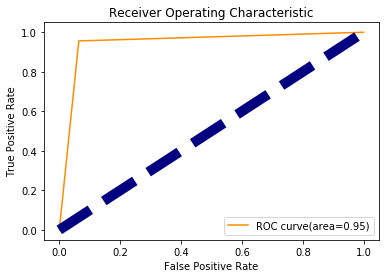

In [100]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10,linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

since our model is performing well, we will select the dataframe.

# Model Saving:

In [101]:
import pickle
filename = 'mushroom.pkl'
pickle.dump(lr, open(filename,'wb'))

# Conclusion:

In [102]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
df_com = pd.DataFrame({"Original":a , "Predicted":predicted} , index = range(len(a)))

df_com

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
1620,1,1
1621,1,1
1622,0,0
1623,1,1


We can visualize that there is almost no error in the outcome using our model.